In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 모든 경고 메시지 끄기
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

이상 저온 ) 평년 대비 10퍼센타일 미만의 기온이 나타나는 현상

기상업무에서 평년값(Standard Normals)의 뜻은 현재는 WMO의 권유에 따라 우리나라에서도 1971년부터 2000년까지의 30년간의 평균값이란 의미로 쓰이고 있음

In [3]:
data= pd.read_csv('/content/drive/MyDrive/기상보간iter.csv')

In [9]:
data.columns

Index(['일 최심적설(cm)', '일시', '합계 3시간 신적설(cm)', '안개 계속시간(hr)', '일강수량(mm)',
       '일 최심신적설(cm)', '지점', '지점명', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
       '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최저 해면기압(hPa)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)',
       '평균 전운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '해양'],
      dtype='object')

In [23]:
#print(data['일시'].str[:4])
#print(data['일시'].str[5:7])
#print(data['일시'].str[8:])

data['연']=data['일시'].str[:4]
data['월']=data['일시'].str[5:7]
data['일']=data['일시'].str[8:]

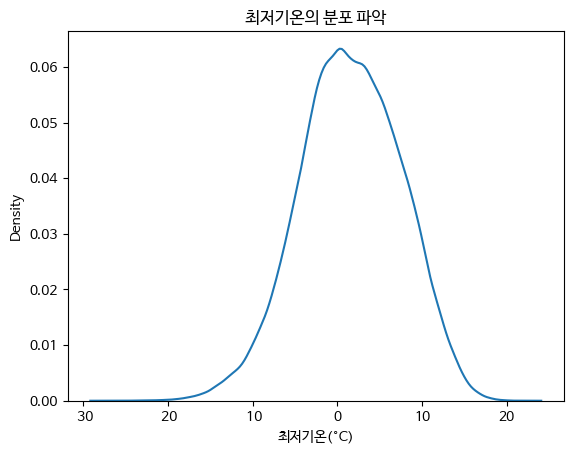

-27.7
22.6


In [11]:
plt.figure()
sns.kdeplot(data,x='최저기온(°C)')
plt.title('최저기온의 분포 파악')
plt.show()

print(min(data['최저기온(°C)']))
print(max(data['최저기온(°C)']))

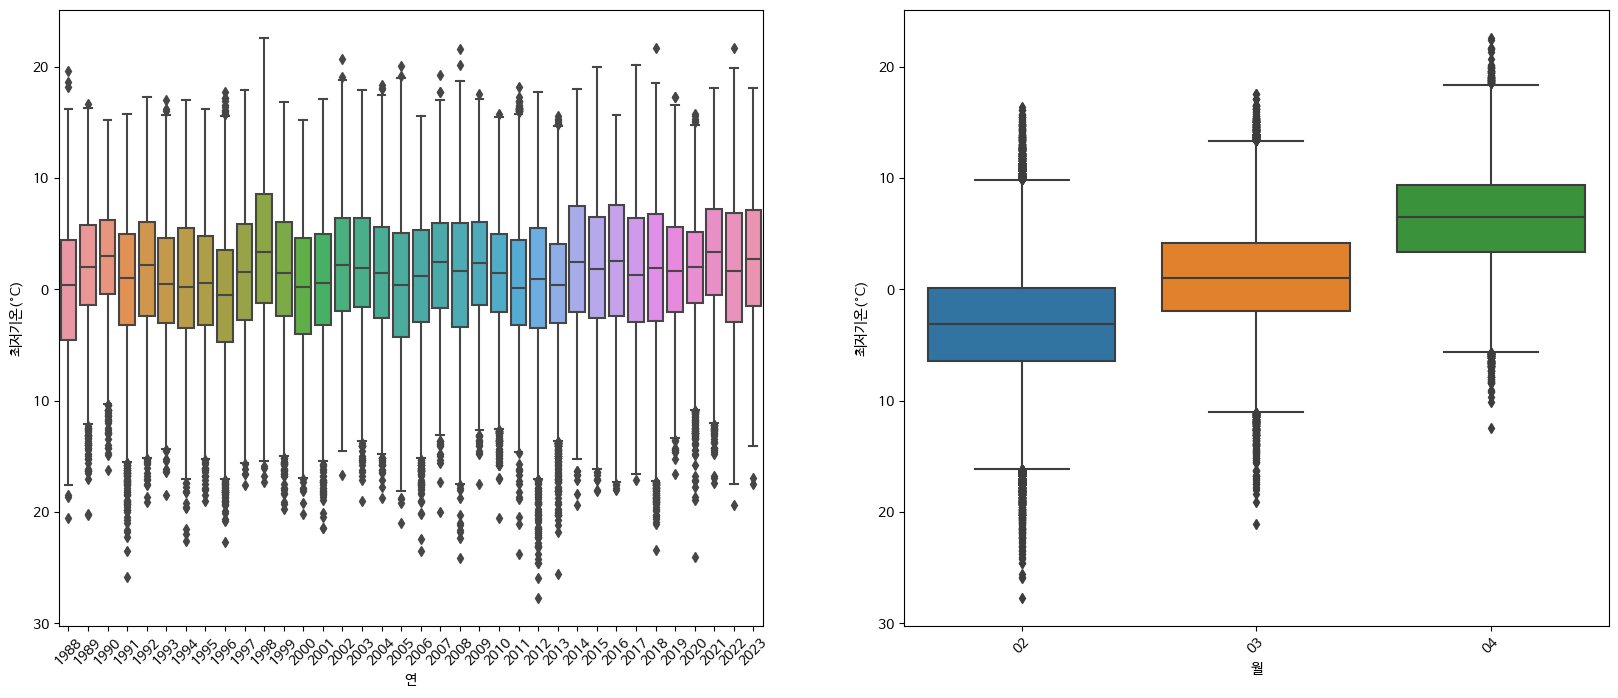

In [29]:
# 연도와 월에 따른 최저 기온 확인

var=['연','월']

plt.figure(figsize=(20,8))
for i, x in enumerate(var,1):
  plt.subplot(1, 2, i)
  sns.boxplot(y='최저기온(°C)',x=x,data=data)
  plt.xticks(rotation=45)

plt.show()

In [43]:
low=data[['일시','최저기온(°C)']].groupby(['일시']).agg(['mean', 'std','count']).droplevel(axis=1, level=0).reset_index()

low['ci'] = 1.96 * low['std'] / np.sqrt(low['count'])
low['ci_lower'] = low['mean'] - low['ci']
low['ci_upper'] = low['mean'] + low['ci']

In [48]:
data=data.drop('일시',axis=1)

In [50]:
cate=['연','월','일','지점']
data[cate] = data[cate].astype('category')

In [55]:
data.drop(['최저기온(°C)','지점'],axis=1)

,일 최심적설(cm),합계 3시간 신적설(cm),안개 계속시간(hr),일강수량(mm),일 최심신적설(cm),지점명,평균기온(°C),최고기온(°C),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),...,평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),평균 전운량(1/10),평균 지면온도(°C),최저 초상온도(°C),해양,연,월,일
0,0.0,0.0,0.0,0.0,0.0,속초,1.9,6.3,28.7,230.0,...,1016.0,10.3,8.8,2.0,1.4,-6.0,1,1988,02,01
1,0.0,0.0,0.0,0.1,0.0,속초,-4.5,3.4,27.4,270.0,...,1014.6,10.3,9.0,0.8,-3.5,-13.2,1,1988,02,02
2,0.0,0.0,0.0,0.0,0.0,속초,-6.4,-1.4,15.8,270.0,...,1017.2,10.3,9.0,1.0,-4.7,-13.1,1,1988,02,03
3,0.0,0.0,0.0,0.0,0.0,속초,0.7,5.0,13.4,250.0,...,1010.3,10.4,1.5,9.0,0.3,-13.1,1,1988,02,04
4,6.6,6.8,0.0,6.0,6.6,속초,1.6,4.0,10.0,320.0,...,1007.5,10.4,0.0,9.8,0.5,-3.2,1,1988,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264455,0.0,0.0,0.0,0.0,0.0,남해,12.2,19.7,11.3,290.0,...,1013.8,13.4,11.5,1.4,16.5,1.9,1,2023,04,26
264456,0.0,0.0,0.0,0.0,0.0,남해,12.8,19.9,6.9,230.0,...,1020.8,13.5,11.2,2.5,18.6,2.4,1,2023,04,27
264457,0.0,0.0,0.0,0.8,0.0,남해,15.8,20.7,9.2,270.0,...,1017.9,13.5,5.5,6.6,19.5,3.2,1,2023,04,28
264458,0.0,0.0,0.0,22.0,0.0,남해,16.6,20.6,9.9,230.0,...,1007.9,13.5,0.0,8.5,18.1,8.0,1,2023,04,29


In [56]:
from sklearn.feature_selection import SelectKBest,f_regression

selector=SelectKBest(score_func=f_regression,k='all')
selected=selector.fit_transform(data.drop(['최저기온(°C)','지점','지점명'],axis=1),data['최저기온(°C)'])
all_names=data.drop(['최저기온(°C)','지점','지점명'],axis=1).columns
selected_mask=selector.get_support()
selected_names=all_names[selected_mask]

scores=pd.DataFrame()
scores['f_reg']=selector.scores_
scores['support']=selector.get_support()
scores['feature']=data.drop(['최저기온(°C)','지점','지점명'],axis=1).columns

x=scores[scores['support']==True]
x=x.sort_values('f_reg',ascending=True)
x['ratio']=x['f_reg']/sum(x['f_reg'])
x

,f_reg,support,feature,ratio
18,1.472902e+02,True,평균 현지기압(hPa),0.000021
2,5.628412e+02,True,안개 계속시간(hr),0.000081
28,6.978638e+02,True,연,0.000101
4,1.895573e+03,True,일 최심신적설(cm),0.000274
1,1.920656e+03,True,합계 3시간 신적설(cm),0.000278
7,3.027089e+03,True,최대 순간 풍속(m/s),0.000438
9,4.248749e+03,True,최대 풍속(m/s),0.000615
0,4.269499e+03,True,일 최심적설(cm),0.000618
11,5.955937e+03,True,평균 풍속(m/s),0.000862
12,5.959192e+03,True,풍정합(100m),0.000862


Text(0.5, 1.0, 'Feature Importance by SelectKBest-reg')

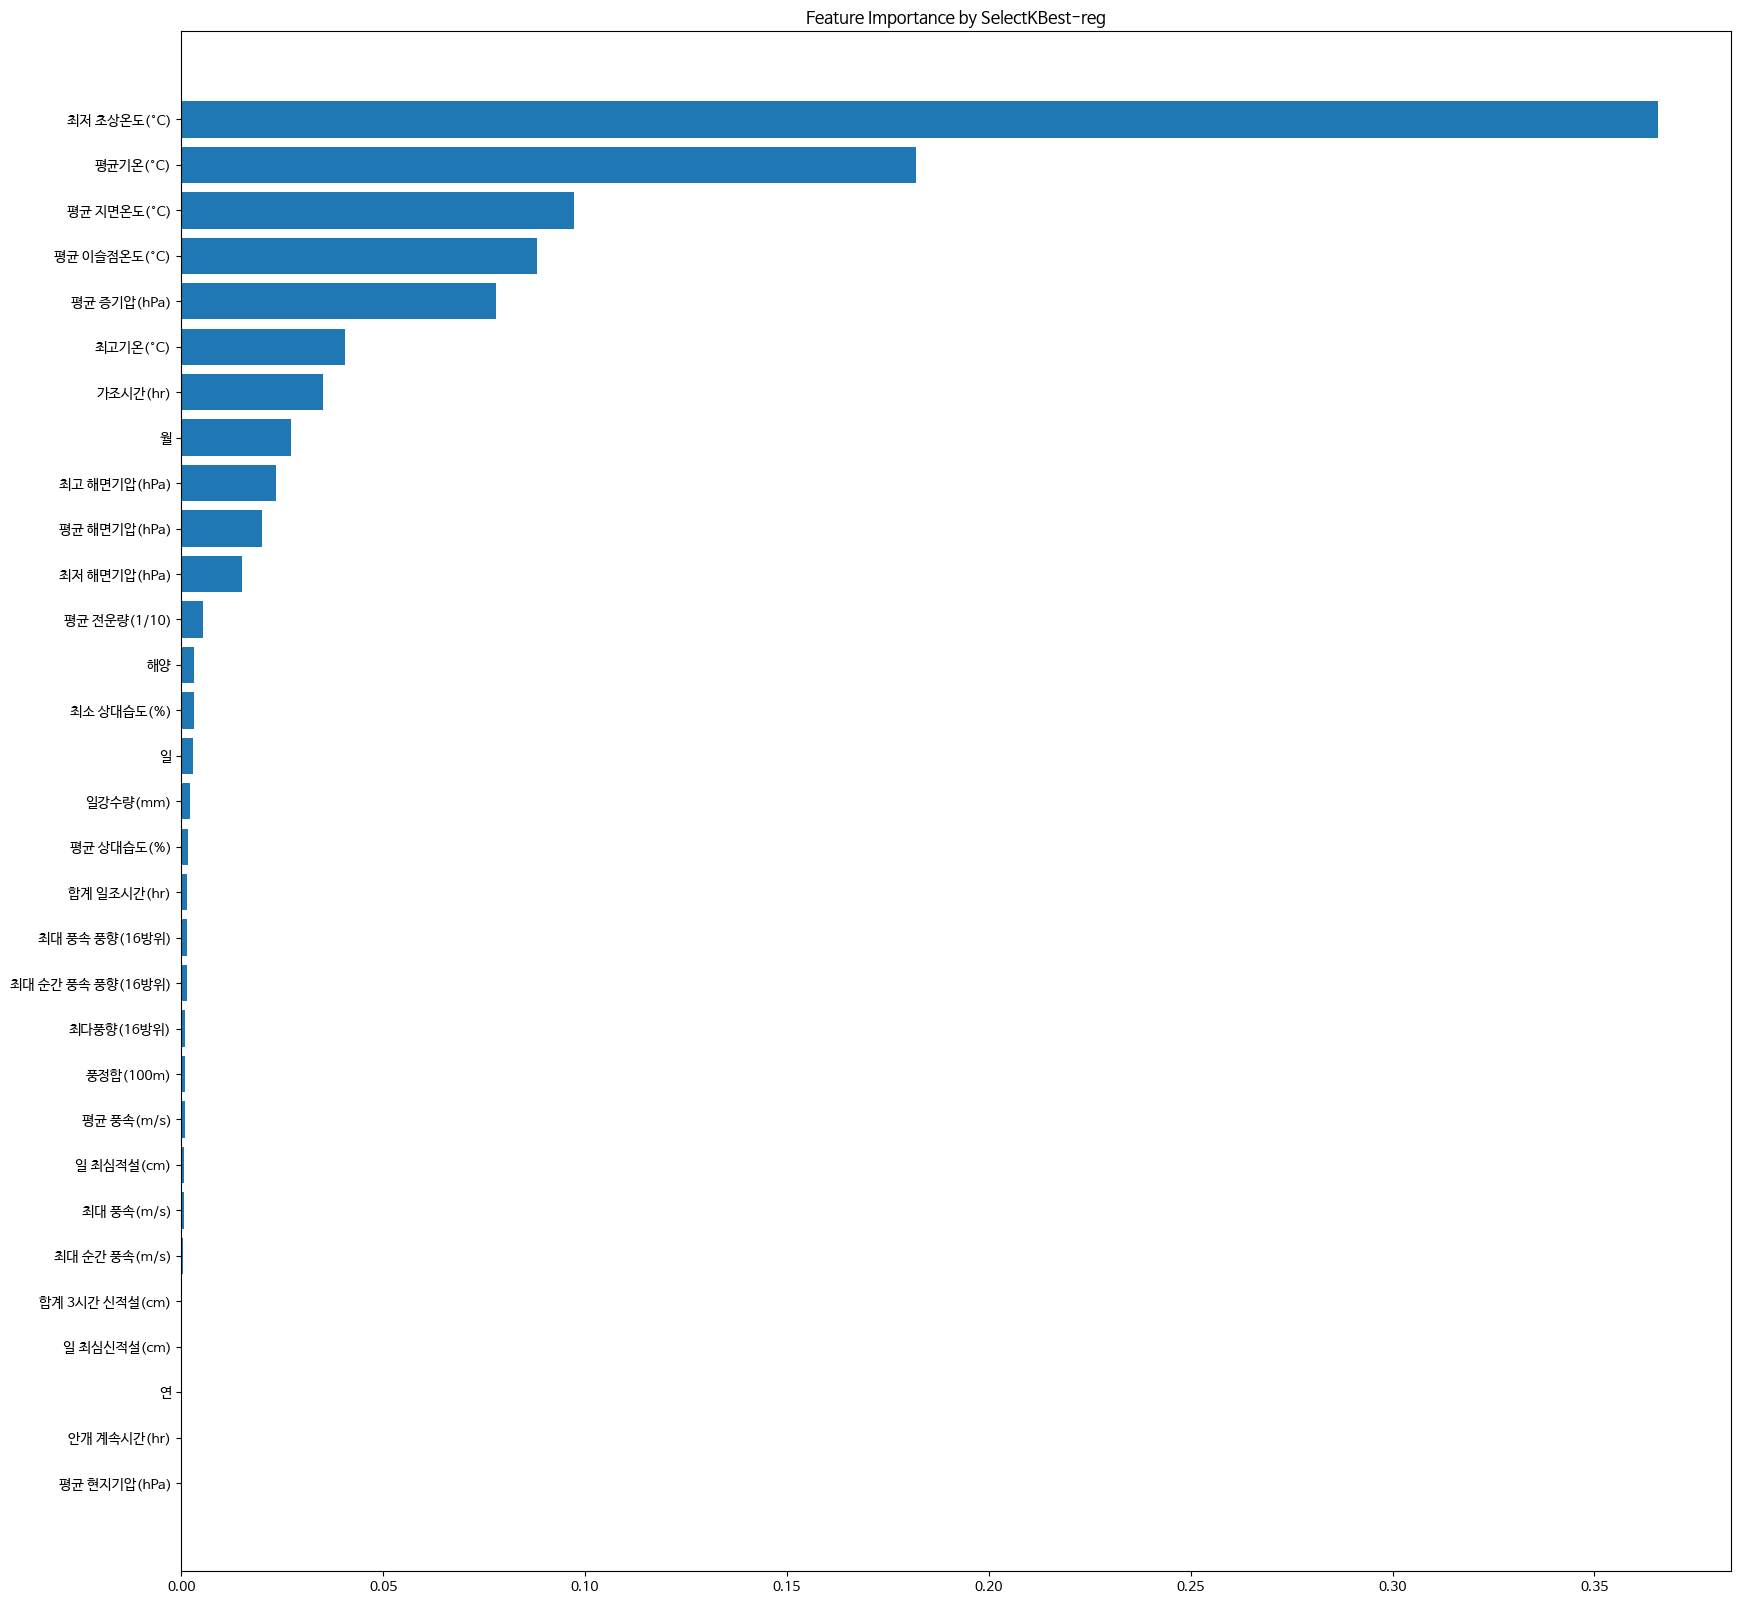

In [57]:
feature=x['feature']
score=x['ratio']

plt.rcParams['figure.figsize'] = [20, 20]
plt.barh(feature,score)
plt.title('Feature Importance by SelectKBest-reg')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '최저 초상온도(°C)'),
  Text(1, 0, '평균기온(°C)'),
  Text(2, 0, '평균 지면온도(°C)'),
  Text(3, 0, '평균 이슬점온도(°C)'),
  Text(4, 0, '평균 증기압(hPa)'),
  Text(5, 0, '최고기온(°C)'),
  Text(6, 0, '가조시간(hr)'),
  Text(7, 0, '월'),
  Text(8, 0, '최고 해면기압(hPa)'),
  Text(9, 0, '평균 해면기압(hPa)'),
  Text(10, 0, '최저 해면기압(hPa)'),
  Text(11, 0, '평균 전운량(1/10)'),
  Text(12, 0, '해양'),
  Text(13, 0, '최소 상대습도(%)'),
  Text(14, 0, '일'),
  Text(15, 0, '일강수량(mm)'),
  Text(16, 0, '평균 상대습도(%)'),
  Text(17, 0, '합계 일조시간(hr)'),
  Text(18, 0, '최대 풍속 풍향(16방위)'),
  Text(19, 0, '최대 순간 풍속 풍향(16방위)'),
  Text(20, 0, '최다풍향(16방위)'),
  Text(21, 0, '풍정합(100m)'),
  Text(22, 0, '평균 풍속(m/s)'),
  Text(23, 0, '일 최심적설(cm)'),
  Text(24, 0, '최대 풍속(m/s)'),
  Text(25, 0, '최대 순간 풍속(m/s)'),
  Text(26, 0, '합계 3시간 신적설(cm)'),
  Text(27, 0, '일 최심신적설(cm)'),
  Text(28, 0, '연'),
  T

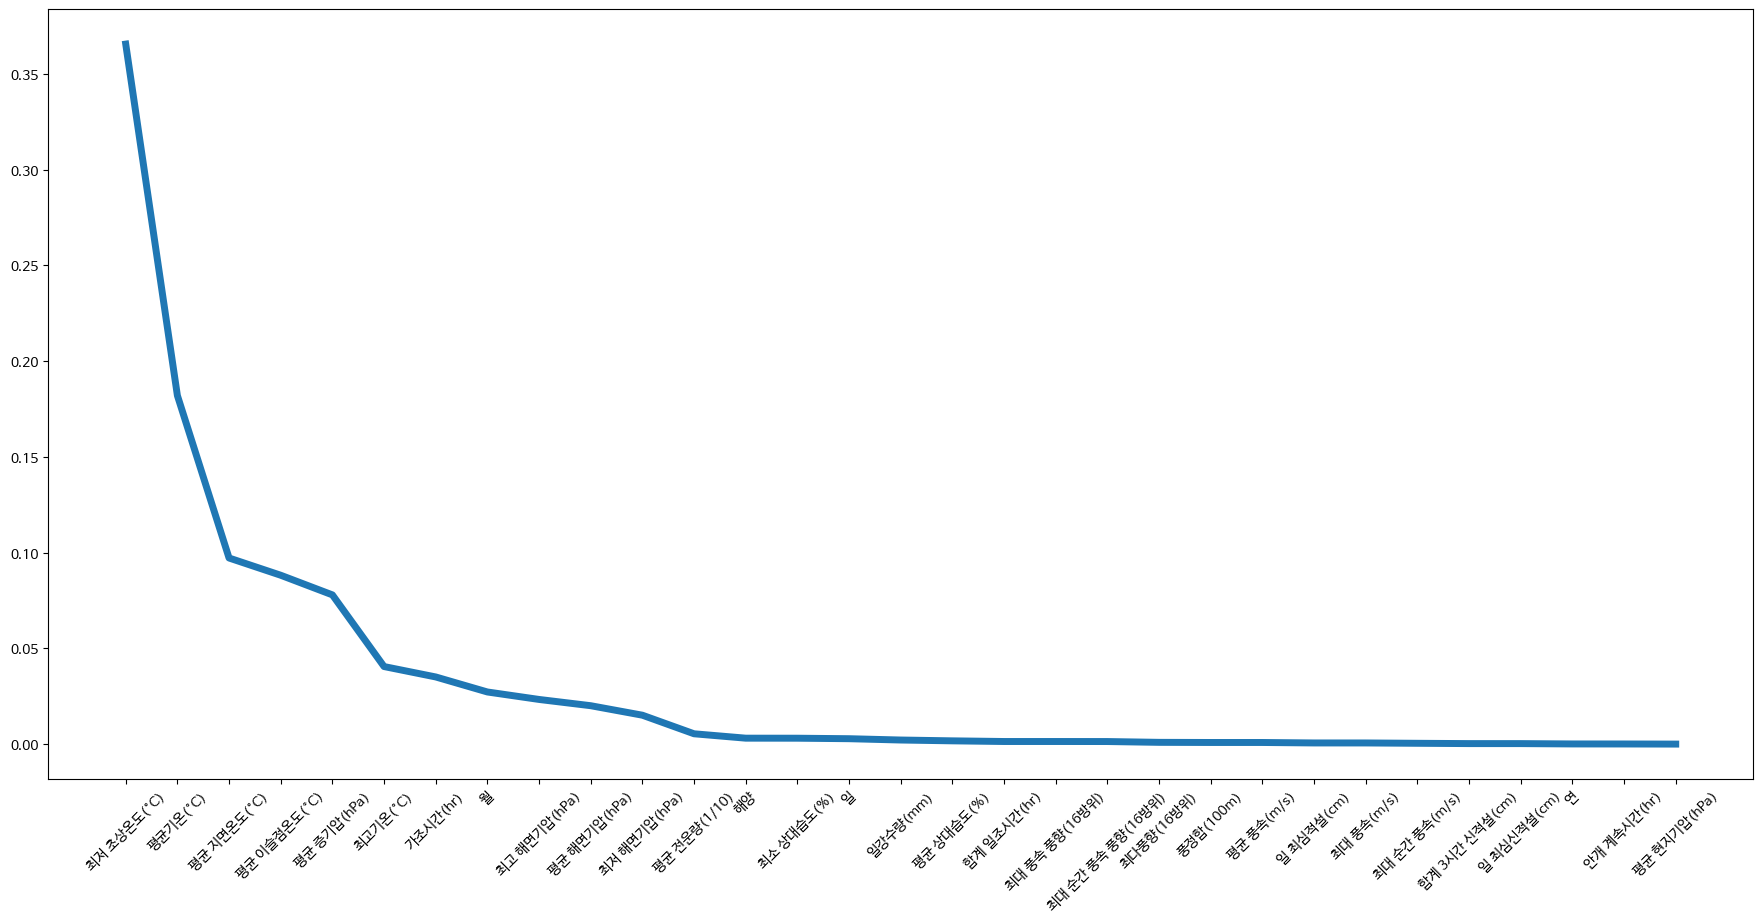

In [68]:
x=scores[scores['support']==True]
x=x.sort_values('f_reg',ascending=False)
x['ratio']=x['f_reg']/sum(x['f_reg'])

plt.figure(figsize=(22,10))
plt.plot(x['feature'],x['ratio'],linewidth='5')
plt.xticks(rotation=45)

In [69]:
list(x['feature'][:5])

['최저 초상온도(°C)',
 '평균기온(°C)',
 '평균 지면온도(°C)',
 '평균 이슬점온도(°C)',
 '평균 증기압(hPa)',
 '최고기온(°C)',
 '가조시간(hr)',
 '월',
 '최고 해면기압(hPa)',
 '평균 해면기압(hPa)',
 '최저 해면기압(hPa)']

# PCA

In [70]:
numeric= data.select_dtypes(include=['number']).columns.tolist()

In [73]:
numeric.remove('해양')

In [74]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리
from sklearn.decomposition import PCA

In [75]:
original= data[numeric]
x = StandardScaler().fit_transform(original)

pca = PCA(n_components=6)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents)
# 주성분으로 이루어진 데이터 프레임 구성


,0,1,2,3,4,5
0,-1.901598,6.231846,0.971860,-0.958507,1.011204,-1.489608
1,-3.856891,7.456835,1.221013,-0.893001,0.766487,-2.180431
2,-5.150794,4.442294,0.791928,-0.440779,-0.037733,-1.923086
3,-1.506835,1.614611,2.166361,-0.009603,-1.715243,-2.288304
4,0.337932,1.301621,6.292090,6.674748,-0.701365,1.316593
...,...,...,...,...,...,...
264455,2.092582,0.525770,-2.462440,0.924890,-0.437650,0.505591
264456,2.009310,-1.324003,-2.007234,0.163026,0.436205,1.544601
264457,4.164680,-1.493154,-0.373232,-0.148458,-0.426758,1.860690
264458,6.675689,-0.990257,1.557116,0.133104,-1.606456,0.659627


In [76]:
pca.explained_variance_ratio_

array([0.30612101, 0.14393504, 0.13747096, 0.07775717, 0.06830508,
       0.05604556])

In [79]:
pd.DataFrame(pca.explained_variance_ratio_).cumsum()

,0
0,0.306121
1,0.450056
2,0.587527
3,0.665284
4,0.733589
5,0.789635


## 갈래 갈래 PCA

In [93]:
condition = pd.DataFrame(data.columns)[0].str.contains('적설')

pd.DataFrame(data.columns)[0][condition].tolist()

['일 최심적설(cm)', '합계 3시간 신적설(cm)', '일 최심신적설(cm)']

In [97]:
def extract(x):
  condition = pd.DataFrame(data.columns)[0].str.contains(x)
  res=pd.DataFrame(data.columns)[0][condition].tolist()
  return(res)

In [98]:
extract('적설') + extract('지점')

['일 최심적설(cm)', '합계 3시간 신적설(cm)', '일 최심신적설(cm)', '지점', '지점명']

In [99]:
# 필요한 분류 : 적설, 기온+온도 , 풍속 + 풍향 + 풍정합 ,기압 ,일사+가조 ,습도

snow = extract('적설')
print(snow)

temp = extract('기온') + extract('온도')
print(temp)

wind = extract('풍속') + extract('풍향') + extract('풍정합')
print(wind)

atm =  extract('기압')
print(atm)

sun = extract('일사') + extract('가조')
print(sun)

humid = extract('습도')
print(humid)

['일 최심적설(cm)', '합계 3시간 신적설(cm)', '일 최심신적설(cm)']
['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 이슬점온도(°C)', '평균 지면온도(°C)', '최저 초상온도(°C)']
['최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '평균 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 풍속 풍향(16방위)', '최다풍향(16방위)', '풍정합(100m)']
['평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최저 해면기압(hPa)', '평균 해면기압(hPa)']
['가조시간(hr)']
['최소 상대습도(%)', '평균 상대습도(%)']


## 바람 관련 변수 pca

In [102]:
original_wind= data[wind]
x_wind = StandardScaler().fit_transform(original_wind)

pca_wind = PCA(n_components=5)  # 주성분을 몇개로 할지 결정
wind_res = pca_wind.fit_transform(x_wind)
windDF = pd.DataFrame(data=wind_res)

In [103]:
pca_wind.explained_variance_ratio_

array([0.48321436, 0.35609654, 0.06791083, 0.05570421, 0.02831349])

In [104]:
pd.DataFrame(pca_wind.explained_variance_ratio_).cumsum()

,0
0,0.483214
1,0.839311
2,0.907222
3,0.962926
4,0.991239
